# `Adv. linear regression model with multiple Feature`

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import copy, math

In [2]:
data = np.genfromtxt("./houses.csv", delimiter=',', skip_header=1)
X = data[:,:4]
y = data[:,4]

In [3]:
X_train = np.array(X)
y_train = np.array(y)

In [4]:
da = pd.DataFrame(data)
da.head()

,0,1,2,3,4
0,952.0,2.0,1.0,65.0,271.5
1,1244.0,3.0,1.0,64.0,300.0
2,1947.0,3.0,2.0,17.0,509.8
3,1725.0,3.0,2.0,42.0,394.0
4,1959.0,3.0,2.0,15.0,540.0


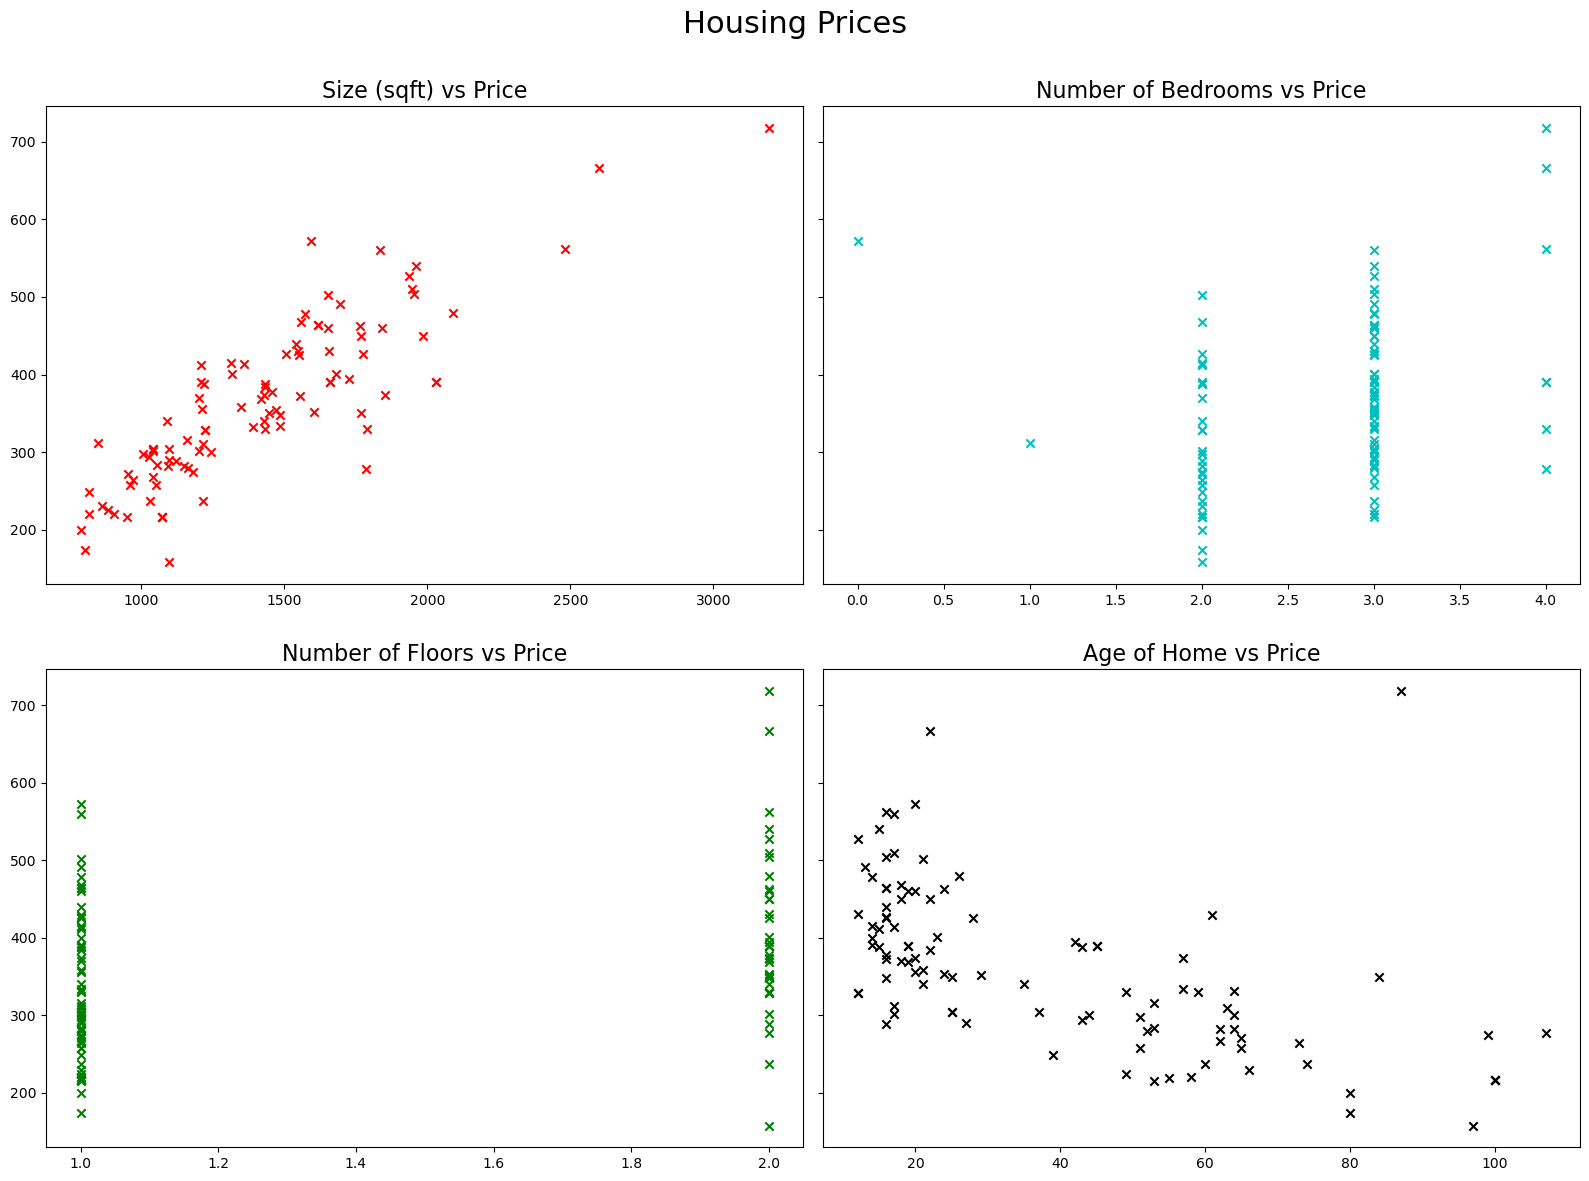

In [5]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharey=True)

ax[0,0].scatter(X_train[:,0], y_train, marker='x', c='r')
ax[0,0].set_title('Size (sqft) vs Price', fontsize=16)

ax[0,1].scatter(X_train[:,1], y_train, marker='x', c='c')
ax[0,1].set_title('Number of Bedrooms vs Price', fontsize=16)

ax[1,0].scatter(X_train[:,2], y_train, marker='x', c='g')
ax[1,0].set_title('\nNumber of Floors vs Price', fontsize=16)

ax[1,1].scatter(X_train[:,3], y_train, marker='x', c='k')
ax[1,1].set_title('\nAge of Home vs Price', fontsize=16)

plt.tight_layout()
fig.suptitle('Housing Prices', fontsize=22)
fig.subplots_adjust(top=0.9)  # Adjust the top to accommodate the suptitle

plt.show()

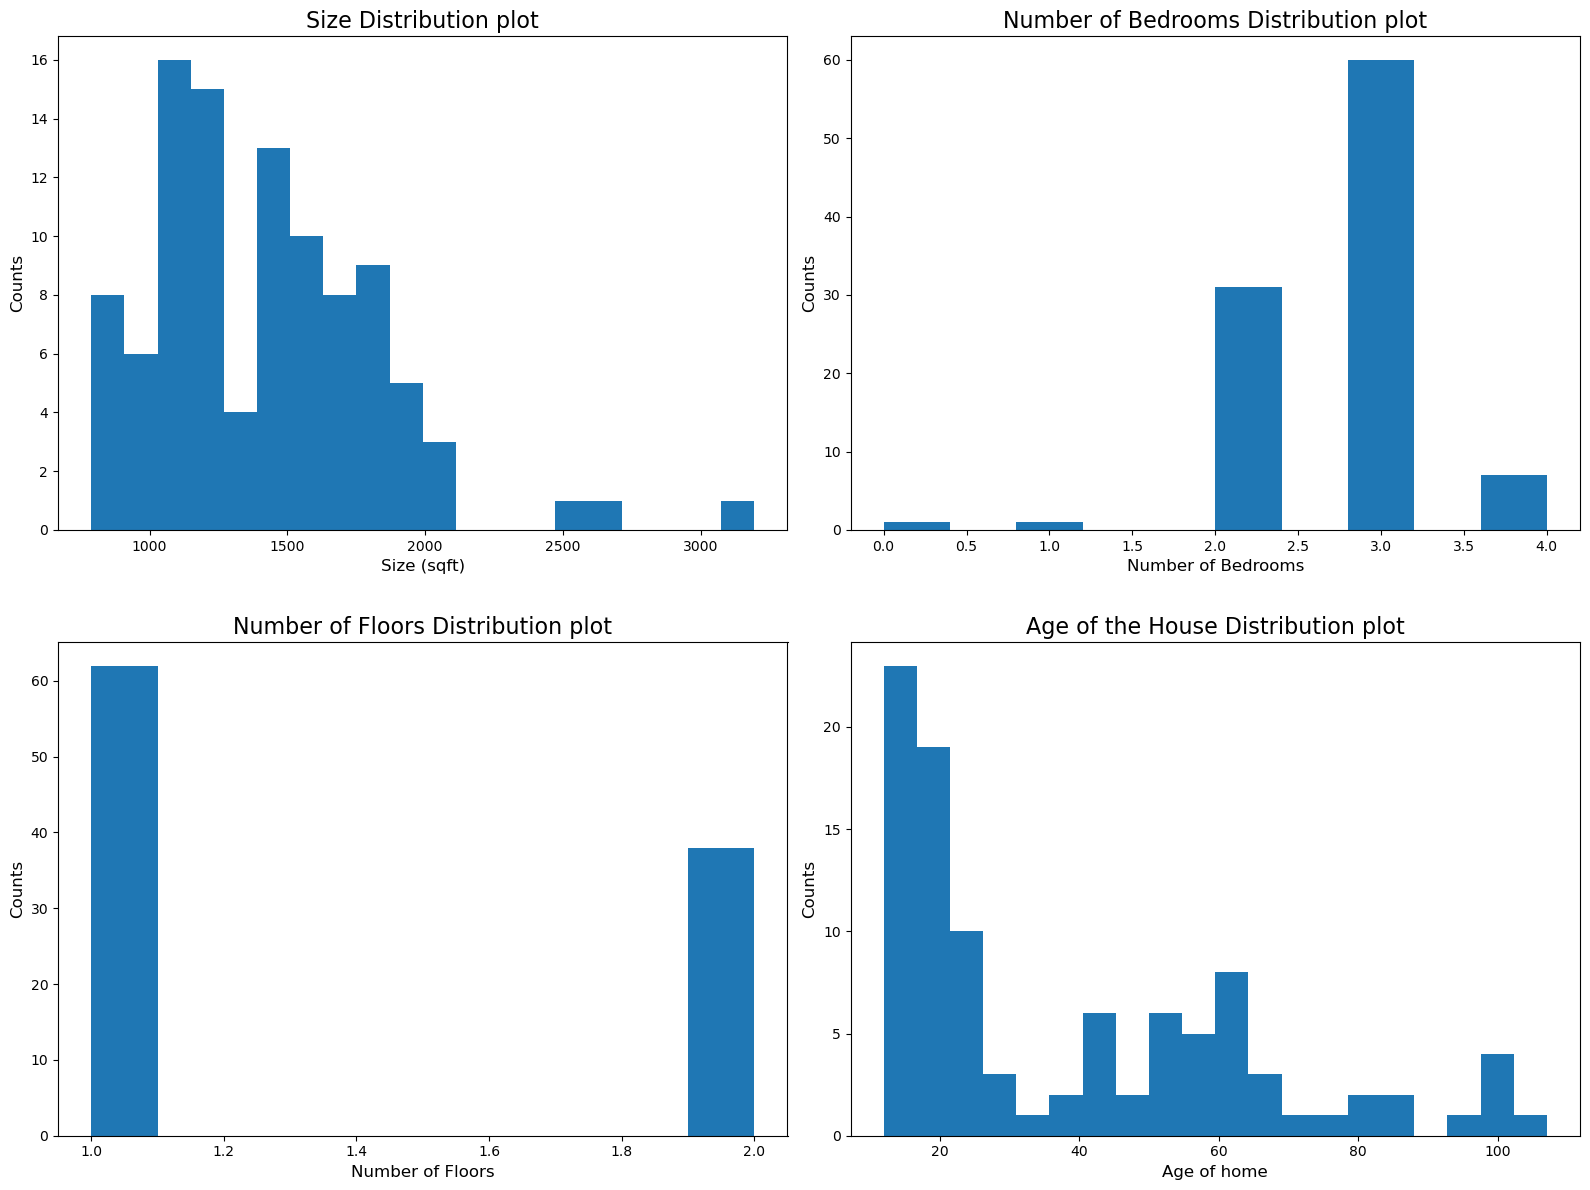

In [6]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

ax[0,0].hist(X_train[:,0], bins=20)
ax[0,0].set_title('Size Distribution plot', fontsize=16)
ax[0,0].set_xlabel('Size (sqft)', fontsize=12)
ax[0,0].set_ylabel('Counts', fontsize=12)

ax[0,1].hist(X_train[:,1], bins=10)
ax[0,1].set_title('Number of Bedrooms Distribution plot', fontsize=16)
ax[0,1].set_xlabel('Number of Bedrooms', fontsize=12)
ax[0,1].set_ylabel('Counts', fontsize=12)

ax[1,0].hist(X_train[:,2], bins=10)
ax[1,0].set_title('\nNumber of Floors Distribution plot', fontsize=16)
ax[1,0].set_xlabel('Number of Floors', fontsize=12)
ax[1,0].set_ylabel('Counts', fontsize=12)

ax[1,1].hist(X_train[:,3], bins=20)
ax[1,1].set_title('\nAge of the House Distribution plot', fontsize=16)
ax[1,1].set_xlabel('Age of home', fontsize=12)
ax[1,1].set_ylabel('Counts', fontsize=12)

plt.tight_layout()
plt.show()

### $$ f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

In [7]:
def compute_model_output(x, w, b):
    p = np.dot(x, w) + b     
    return p

### $$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2$$ 

In [8]:
def compute_cost(X, y, w, b): 
    m = X.shape[0]
    cost = 0.0
    for i in range(m):                                
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

### $$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)}\\\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})\\
\end{align}
$$

In [9]:
def compute_gradient(X, y, w, b): 
    m, n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.

    for i in range(m):                             
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):                         
            dj_dw[j] += err * X[i, j]
        dj_db += err
    dj_dw /= m
    dj_db /= m
        
    return dj_db, dj_dw

In [10]:
def gradient_descent(X, y, w_in, b_in, cost_function, compute_gradient, alpha, num_iters): 
    # An array to store cost J and w's at each iteration primarily for graphing later
    J_history = []
    w = copy.deepcopy(w_in)  #avoid modifying global w within function
    b = b_in
    
    for i in range(num_iters):

        # Calculate the gradient and update the parameters
        dj_db,dj_dw = compute_gradient(X, y, w, b)   ##None

        # Update Parameters using w, b, alpha and gradient
        w = w - alpha * dj_dw               ##None
        b = b - alpha * dj_db               ##None
      
        # Save cost J at each iteration
        if i<100000:      # prevent resource exhaustion 
            J_history.append( cost_function(X, y, w, b))

        # Print cost every at intervals 10 times or as many iterations if < 10
        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history #return final w,b and J history for graphing

In [11]:
# initialize parameters
initial_w = np.zeros(4)
initial_b = 0.
# some gradient descent settings
iterations = 150000
alpha = 1.0e-7
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_train, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 44154.43   
Iteration 15000: Cost  1352.72   
Iteration 30000: Cost  1338.95   
Iteration 45000: Cost  1337.92   
Iteration 60000: Cost  1337.70   
Iteration 75000: Cost  1337.52   
Iteration 90000: Cost  1337.35   
Iteration 105000: Cost  1337.24   
Iteration 120000: Cost  1337.24   
Iteration 135000: Cost  1337.24   
b,w found by gradient descent: 0.11,[ 0.26991078 -0.01056318 -0.10920914 -0.70187459] 


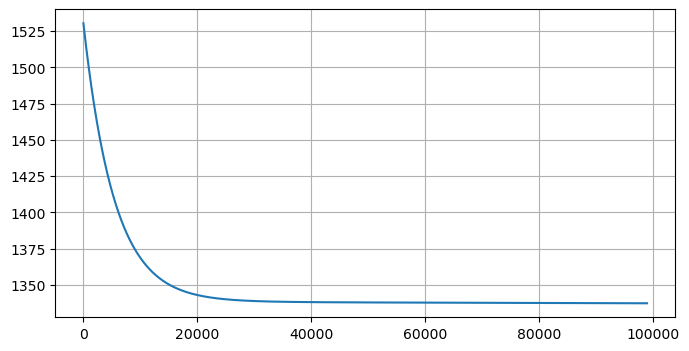

In [12]:
plt.figure(figsize=(8, 4))
plt.plot(J_hist[1000:])
plt.grid(True)

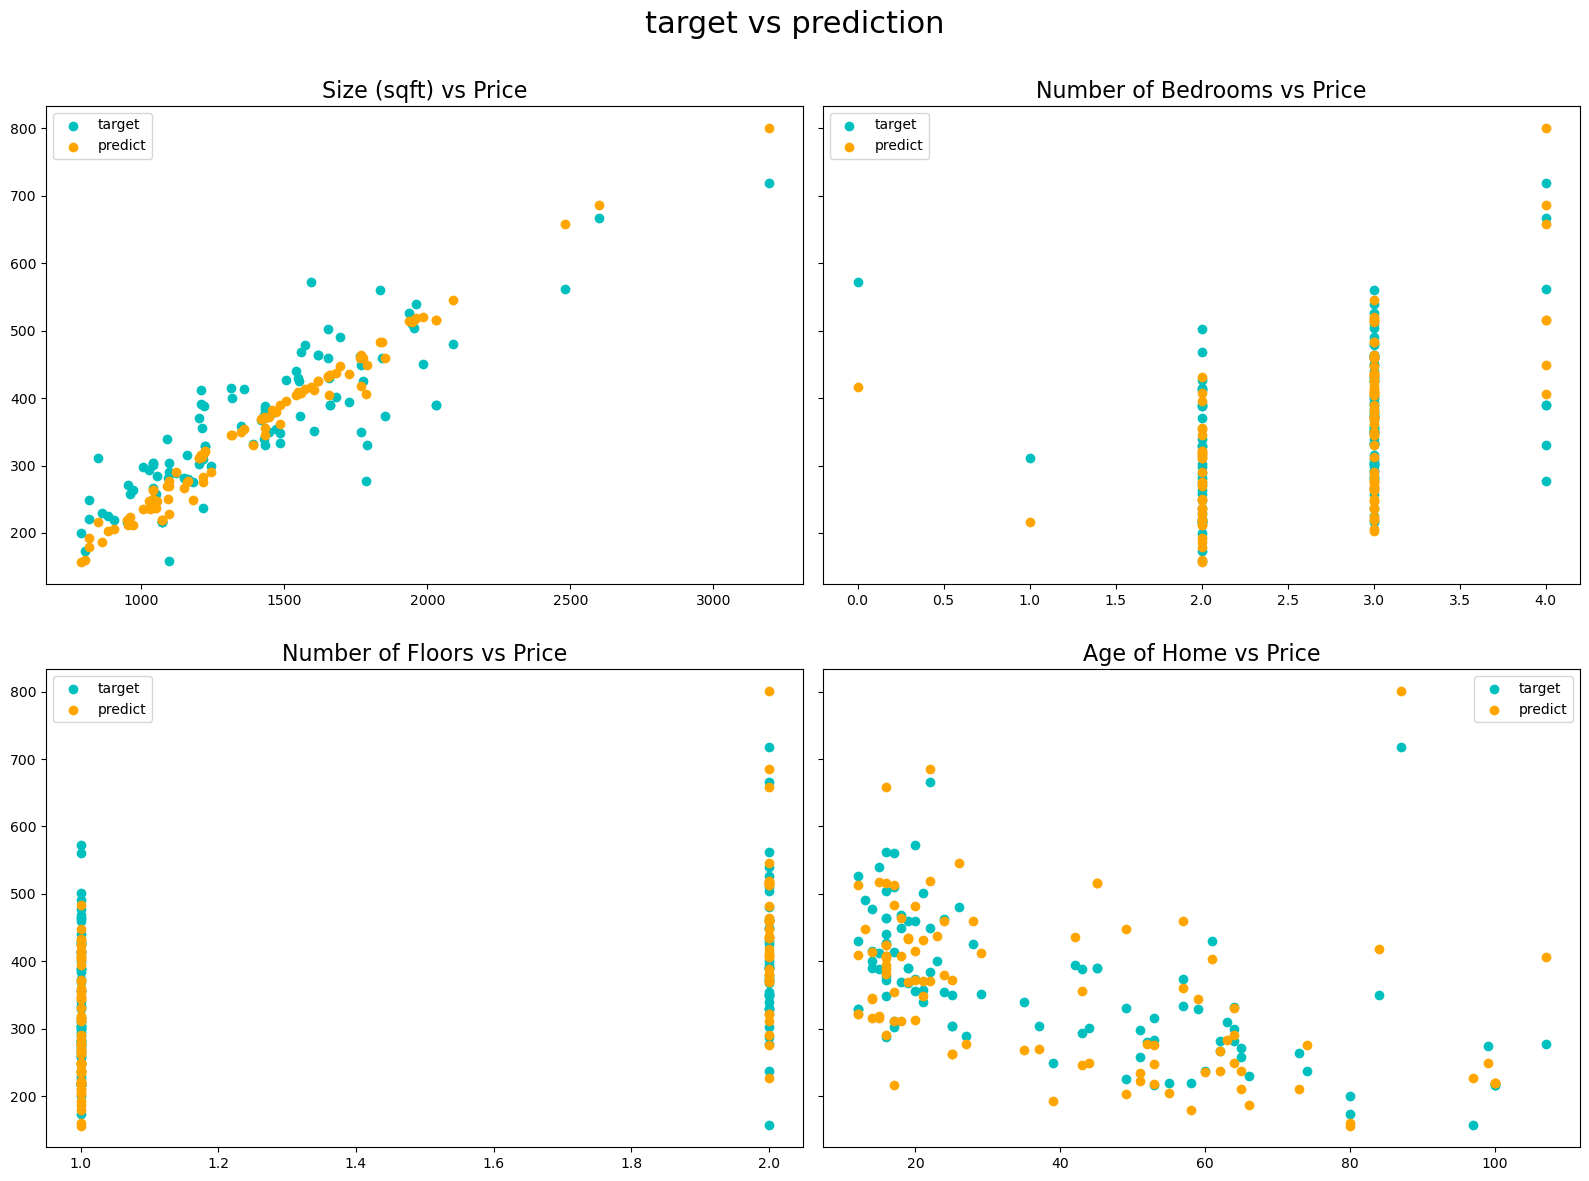

In [13]:
f_wb = compute_model_output(X_train, w_final, b_final)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharey=True)

ax[0,0].scatter(X_train[:,0], y_train, marker='o', c='c', label='target')
ax[0,0].scatter(X_train[:,0], f_wb, marker='o', c='orange', label='predict')
ax[0,0].set_title('Size (sqft) vs Price', fontsize=16)
ax[0,0].legend()

ax[0,1].scatter(X_train[:,1], y_train, marker='o', c='c', label='target')
ax[0,1].scatter(X_train[:,1], f_wb, marker='o', c='orange', label='predict')
ax[0,1].set_title('Number of Bedrooms vs Price', fontsize=16)
ax[0,1].legend()

ax[1,0].scatter(X_train[:,2], y_train, marker='o', c='c', label='target')
ax[1,0].scatter(X_train[:,2], f_wb, marker='o', c='orange', label='predict')
ax[1,0].set_title('\nNumber of Floors vs Price', fontsize=16)
ax[1,0].legend()

ax[1,1].scatter(X_train[:,3], y_train, marker='o', c='c', label='target')
ax[1,1].scatter(X_train[:,3], f_wb, marker='o', c='orange', label='predict')
ax[1,1].set_title('\nAge of Home vs Price', fontsize=16)
ax[1,1].legend()

plt.tight_layout()
fig.suptitle('target vs prediction', fontsize=22)
fig.subplots_adjust(top=0.9)  # Adjust the top to accommodate the suptitle

plt.show()

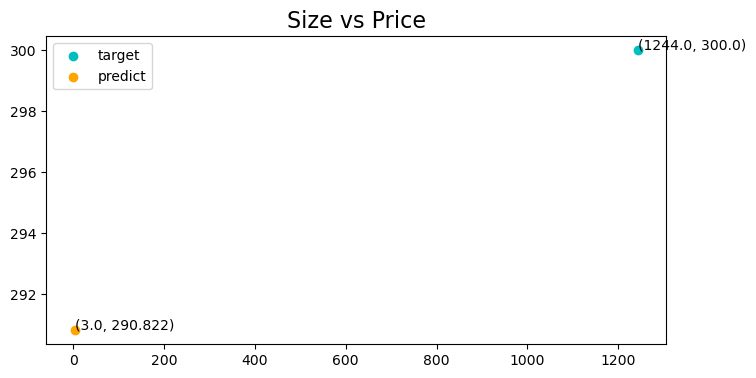

In [14]:
X_test = X_train[1,:]
y_test = y_train[1]

tmp_f_wb = np.dot(w_final, X_test) + b_final

plt.figure(figsize=(8,4))

plt.scatter(X_train[1,0], y_train[1], marker='o', c='c', label='target')
plt.annotate(text=f"({X_train[1,0]}, {y_train[1]})", xy=[X_train[1,0], y_train[1]])
plt.scatter(X_test[1], tmp_f_wb, marker='o', c='orange', label='predict')
plt.annotate(text=f"({X_test[1]}, {tmp_f_wb:.3f})", xy=[X_test[1], tmp_f_wb])
plt.title('Size vs Price', fontsize=16)
plt.legend()

plt.show()

In [15]:
print(f"y_hat = ${tmp_f_wb}\n")

y_hat = $290.82242943709025



## `Feature Scaling`


### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2
\end{align}
$$

In [16]:
def zscore_normalize_features(X):
    mu     = np.mean(X, axis=0)
    sigma  = np.std(X, axis=0)
    X_norm = (X - mu) / sigma      

    return (X_norm, mu, sigma)

# Verify
#from sklearn.preprocessing import scale
#scale(X_orig, axis=0, with_mean=True, with_std=True, copy=True)

In [17]:
# normalize the original features
X_norm, X_mu, X_sigma = zscore_normalize_features(X_train)
print(f"X_mu = {X_mu}, \nX_sigma = {X_sigma}")
print(f"Peak to Peak range by column in Raw        X:{np.ptp(X_train,axis=0)}")   
print(f"Peak to Peak range by column in Normalized X:{np.ptp(X_norm,axis=0)}")

X_mu = [1.41371e+03 2.71000e+00 1.38000e+00 3.86500e+01], 
X_sigma = [412.17283499   0.65261014   0.48538644  25.78502472]
Peak to Peak range by column in Raw        X:[2.406e+03 4.000e+00 1.000e+00 9.500e+01]
Peak to Peak range by column in Normalized X:[5.83735704 6.12923357 2.06021411 3.68430905]


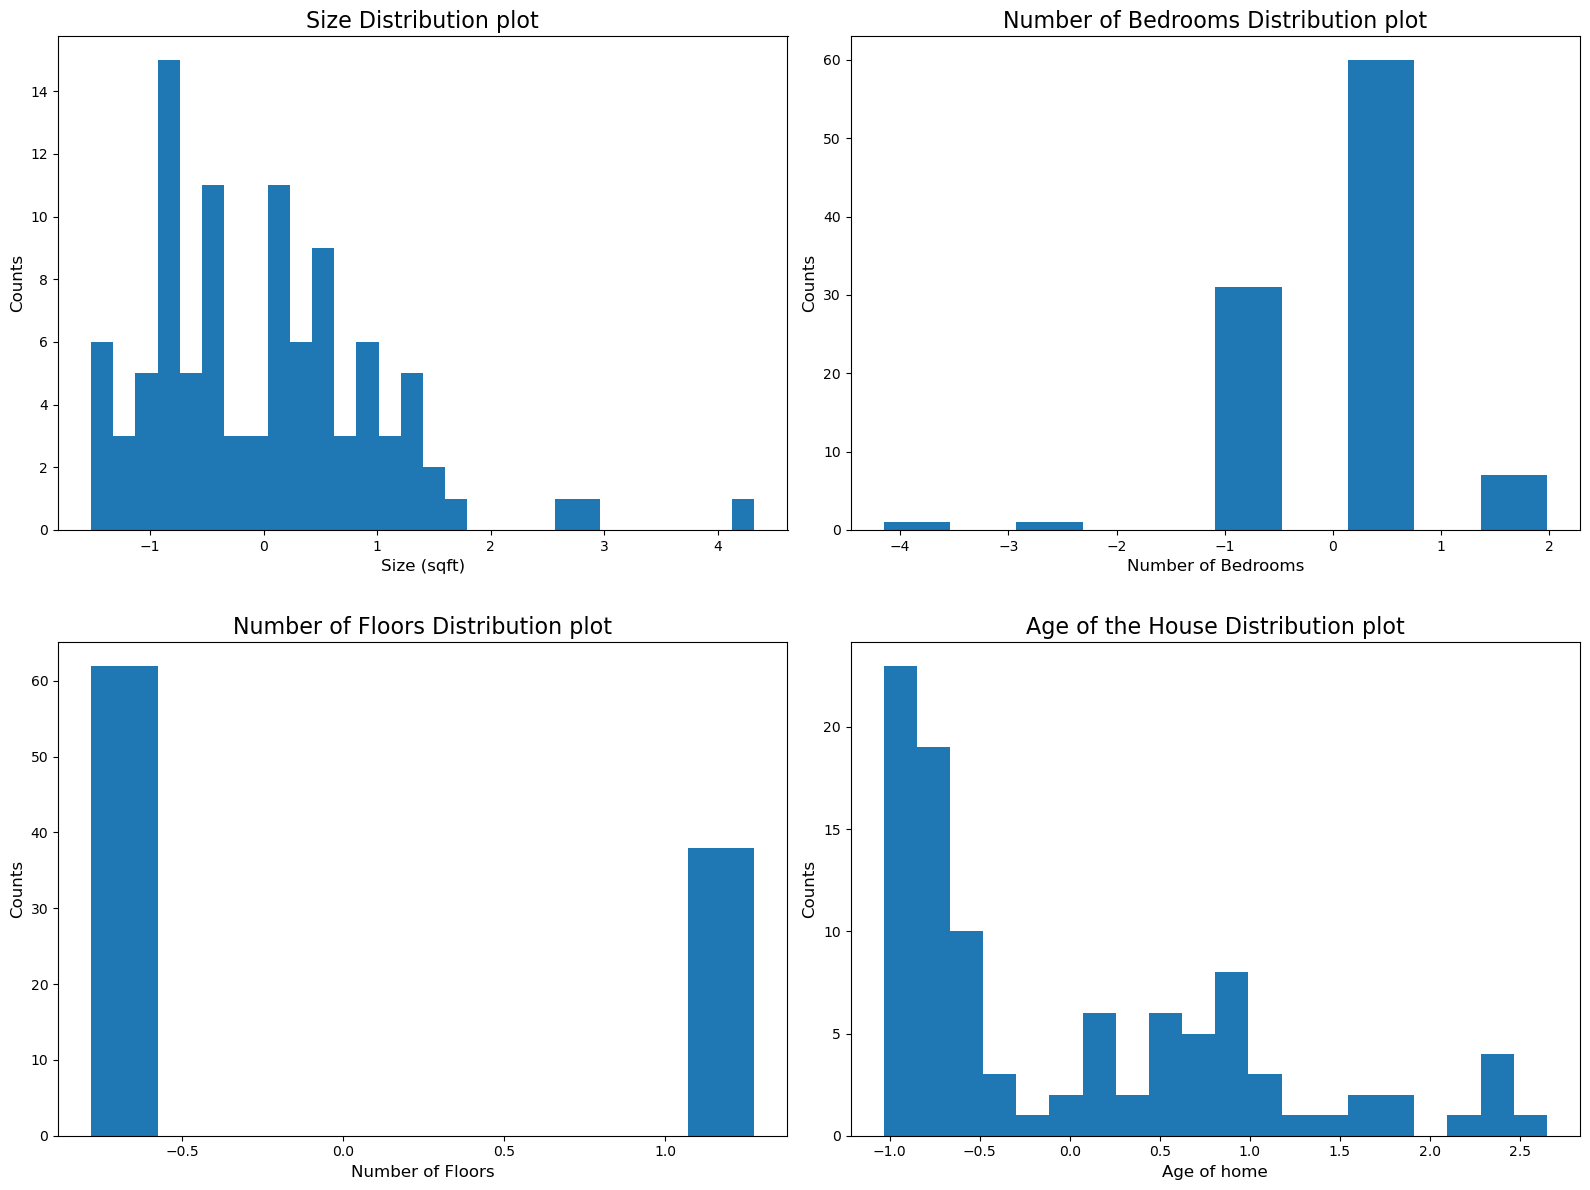

In [18]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12))

ax[0,0].hist(X_norm[:,0], bins=30)
ax[0,0].set_title('Size Distribution plot', fontsize=16)
ax[0,0].set_xlabel('Size (sqft)', fontsize=12)
ax[0,0].set_ylabel('Counts', fontsize=12)

ax[0,1].hist(X_norm[:,1], bins=10)
ax[0,1].set_title('Number of Bedrooms Distribution plot', fontsize=16)
ax[0,1].set_xlabel('Number of Bedrooms', fontsize=12)
ax[0,1].set_ylabel('Counts', fontsize=12)

ax[1,0].hist(X_norm[:,2], bins=10)
ax[1,0].set_title('\nNumber of Floors Distribution plot', fontsize=16)
ax[1,0].set_xlabel('Number of Floors', fontsize=12)
ax[1,0].set_ylabel('Counts', fontsize=12)

ax[1,1].hist(X_norm[:,3], bins=20)
ax[1,1].set_title('\nAge of the House Distribution plot', fontsize=16)
ax[1,1].set_xlabel('Age of home', fontsize=12)
ax[1,1].set_ylabel('Counts', fontsize=12)

plt.tight_layout()
plt.show()

In [19]:
# initialize parameters
initial_w = np.zeros(4)
initial_b = 0.
# some gradient descent settings
iterations = 10000
alpha = 1.0e-2
# run gradient descent 
w_final, b_final, J_hist = gradient_descent(X_norm, y_train, initial_w, initial_b,
                                                    compute_cost, compute_gradient, 
                                                    alpha, iterations)
print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")

Iteration    0: Cost 69584.12   
Iteration 1000: Cost   222.08   
Iteration 2000: Cost   219.71   
Iteration 3000: Cost   219.71   
Iteration 4000: Cost   219.71   
Iteration 5000: Cost   219.71   
Iteration 6000: Cost   219.71   
Iteration 7000: Cost   219.71   
Iteration 8000: Cost   219.71   
Iteration 9000: Cost   219.71   
b,w found by gradient descent: 362.24,[110.61335173 -21.47323884 -32.66070323 -37.77938362] 


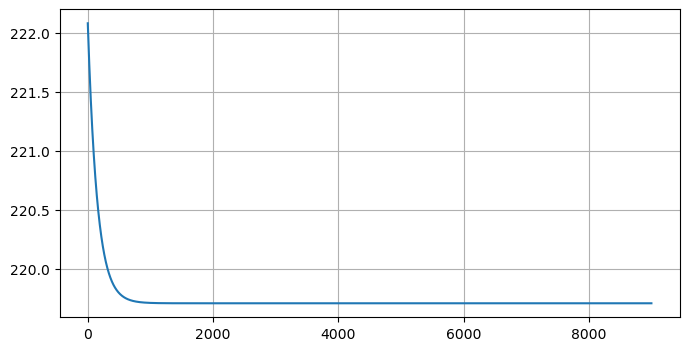

In [20]:
plt.figure(figsize=(8, 4))
plt.plot(J_hist[1000:])
plt.grid(True)

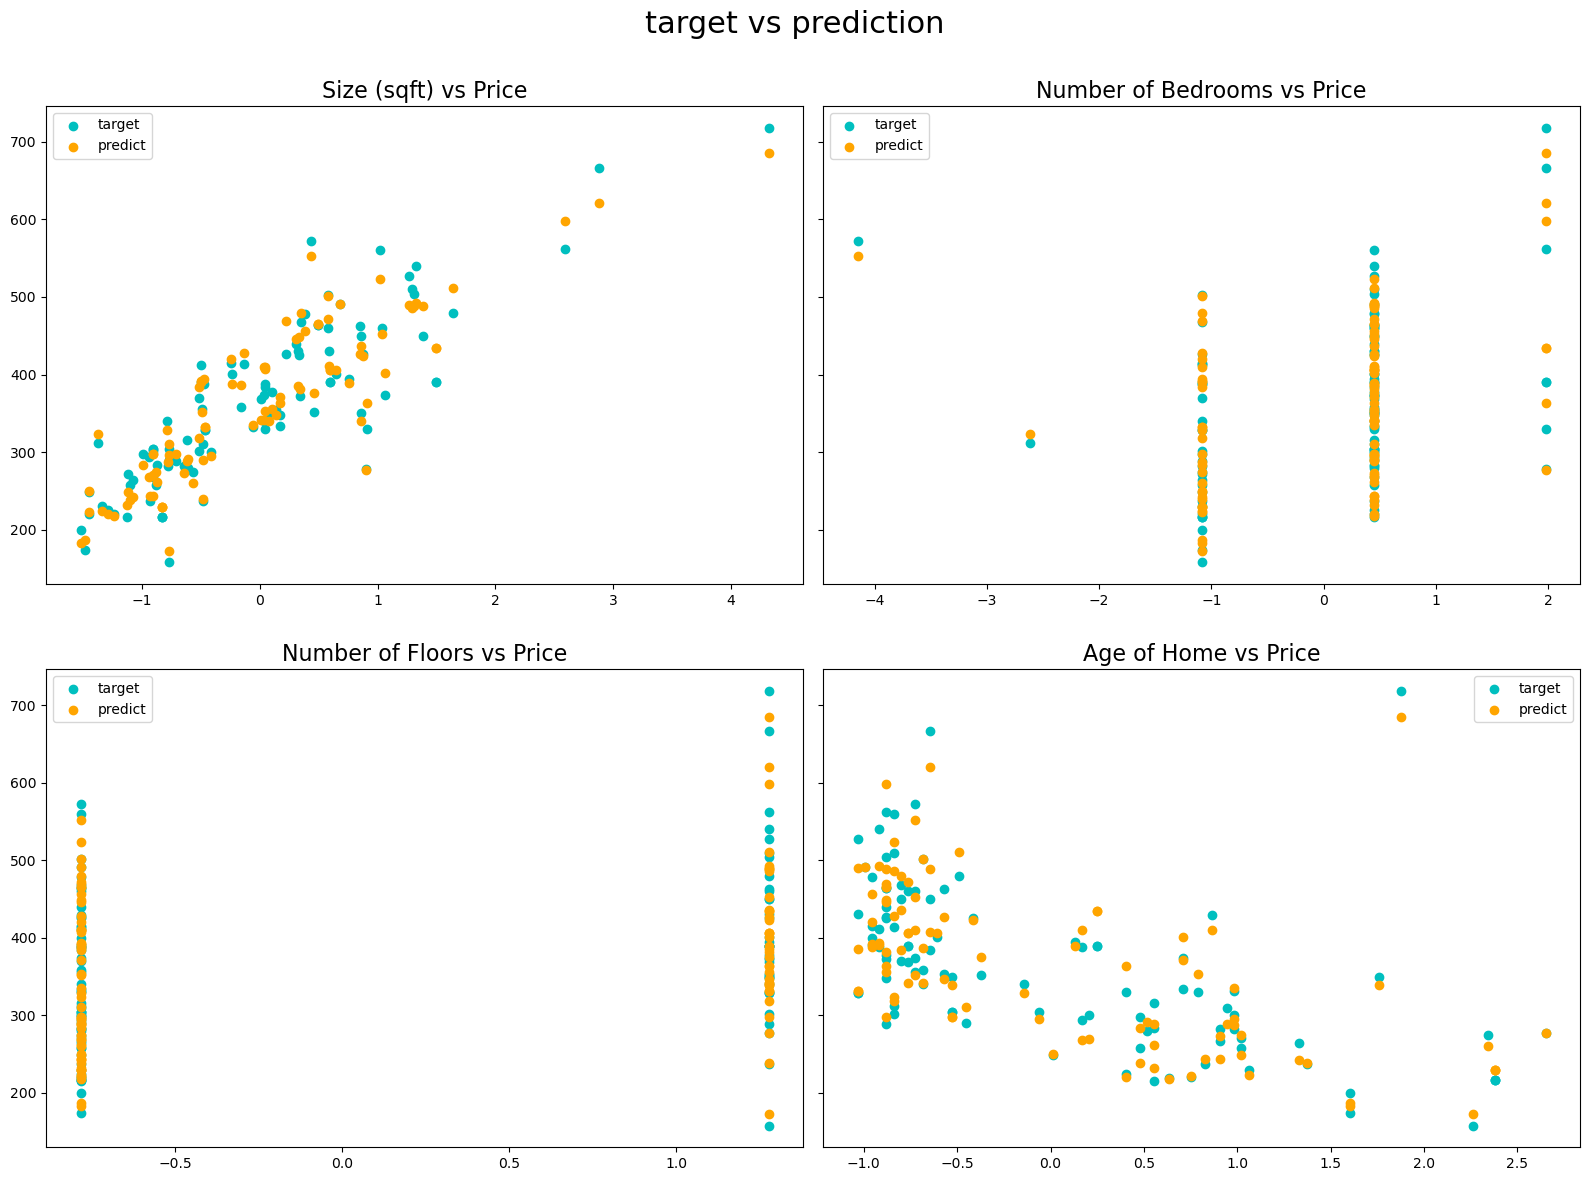

In [21]:
f_wb = compute_model_output(X_norm, w_final, b_final)

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 12), sharey=True)

ax[0,0].scatter(X_norm[:,0], y_train, marker='o', c='c', label='target')
ax[0,0].scatter(X_norm[:,0], f_wb, marker='o', c='orange', label='predict')
ax[0,0].set_title('Size (sqft) vs Price', fontsize=16)
ax[0,0].legend()

ax[0,1].scatter(X_norm[:,1], y_train, marker='o', c='c', label='target')
ax[0,1].scatter(X_norm[:,1], f_wb, marker='o', c='orange', label='predict')
ax[0,1].set_title('Number of Bedrooms vs Price', fontsize=16)
ax[0,1].legend()

ax[1,0].scatter(X_norm[:,2], y_train, marker='o', c='c', label='target')
ax[1,0].scatter(X_norm[:,2], f_wb, marker='o', c='orange', label='predict')
ax[1,0].set_title('\nNumber of Floors vs Price', fontsize=16)
ax[1,0].legend()

ax[1,1].scatter(X_norm[:,3], y_train, marker='o', c='c', label='target')
ax[1,1].scatter(X_norm[:,3], f_wb, marker='o', c='orange', label='predict')
ax[1,1].set_title('\nAge of Home vs Price', fontsize=16)
ax[1,1].legend()

plt.tight_layout()
fig.suptitle('target vs prediction', fontsize=22)
fig.subplots_adjust(top=0.9)  # Adjust the top to accommodate the suptitle

plt.show()

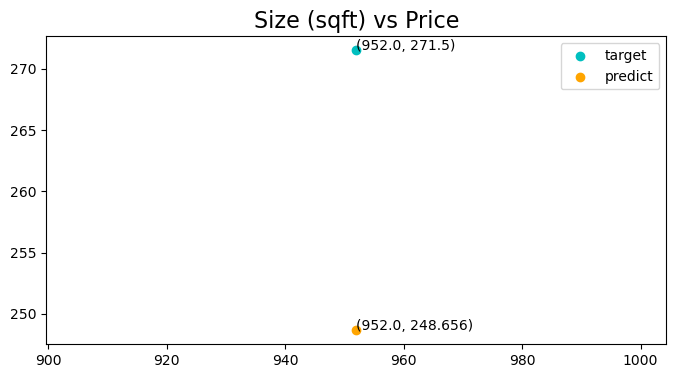

In [22]:
# First, normalize out example.
x_test = np.array(X_train[0,:])
x_test_norm = (x_test - X_mu) / X_sigma
y_test = y_train[0]

tmp_f_wb = np.dot(w_final, x_test_norm) + b_final

plt.figure(figsize=(8,4))

plt.scatter(X_train[0,0], y_train[0], marker='o', c='c', label='target')
plt.annotate(text=f"({X_train[0,0]}, {y_train[0]})", xy=[X_train[0,0], y_train[0]])

plt.scatter(x_test[0], tmp_f_wb, marker='o', c='orange', label='predict')
plt.annotate(text=f"({x_test[0]}, {tmp_f_wb:.3f})", xy=[x_test[0], tmp_f_wb])

plt.title('Size (sqft) vs Price', fontsize=16)

plt.legend()
plt.show()

In [23]:
tmp_f_wb

248.6559179842517